# Εργαστηριακή Άσκηση 2. Μη επιβλεπόμενη μάθηση. 
## Σύστημα συστάσεων βασισμένο στο περιεχόμενο
## Σημασιολογική απεικόνιση δεδομένων με χρήση SOM 
Ημερομηνία εκφώνησης της άσκησης: 23 Νοεμβρίου 2021


---



---
<h1><center>Ομάδα: 86</center></h1>
<center>
Σκουρτσή Δήμητρα Άννα: el18044


Στεργιόπουλος Αναστάσιος: el18605


Φιλίππα Μυρσίνη: el18151
</center>

---


---



In [1]:
!pip install --upgrade pip
!pip install --upgrade numpy
!pip install --upgrade pandas
!pip install --upgrade nltk
!pip install --upgrade scikit-learn
!pip install --upgrade joblib

## Εισαγωγή του Dataset

Το σύνολο δεδομένων με το οποίο θα δουλέψουμε είναι βασισμένο στο [Carnegie Mellon Movie Summary Corpus](http://www.cs.cmu.edu/~ark/personas/). Πρόκειται για ένα dataset με 22.301 περιγραφές ταινιών. Η περιγραφή κάθε ταινίας αποτελείται από τον τίτλο της, μια ή περισσότερες ετικέτες που χαρακτηρίζουν το είδος της ταινίας και τέλος τη σύνοψη της υπόθεσής της. Αρχικά εισάγουμε το dataset (χρησιμοποιήστε αυτούσιο τον κώδικα, δεν χρειάζεστε το αρχείο csv) στο dataframe `df_data_1`: 

In [2]:
import pandas as pd

dataset_url = "https://drive.google.com/uc?export=download&id=1-tN5rC1QCgwqL67cvIXdMbtd-Xf9Xqow"
df_data_1 = pd.read_csv(dataset_url, sep='\t',  header=None, quoting=3)

Κάθε ομάδα θα δουλέψει σε **ένα μοναδικό υποσύνολο 5.000 ταινιών** (διαφορετικό dataset για κάθε ομάδα) ως εξής:

1. Κάθε ομάδα του εργαστηρίου νευρωνικών έχει έναν αριθμό στο helios. Θα βάλετε τον αριθμό αυτό στη μεταβλητή team_seed_number στο επόμενο κελί κώδικα.

2. Το data frame `df_data_2` έχει γραμμές όσες και οι ομάδες και 5.000 στήλες. Σε κάθε ομάδα αντιστοιχεί η γραμμή του πίνακα με το `team_seed_number` της. Η γραμμή αυτή θα περιλαμβάνει 5.000 διαφορετικούς αριθμούς που αντιστοιχούν σε ταινίες του αρχικού dataset. 

3. Τρέξτε τον κώδικα. Θα προκύψουν τα μοναδικά για κάθε ομάδα  titles, categories, catbins, summaries και corpus με τα οποία θα δουλέψετε.

In [3]:
import numpy as np

# Στο επόμενη γραμή βάλτε τον αριθμό της ομάδας στο εργαστήριο των νευρωνικών
team_seed_number = 86

movie_seeds_url = "https://drive.google.com/uc?export=download&id=1-oeMf7BFmiH70XObgC9WOTo-a9cDJZwP"
df_data_2 = pd.read_csv(movie_seeds_url, header=None)

# επιλέγεται 
my_index = df_data_2.iloc[team_seed_number,:].values

titles = df_data_1.iloc[:, [2]].values[my_index] # movie titles (string)
categories = df_data_1.iloc[:, [3]].values[my_index] # movie categories (string)
bins = df_data_1.iloc[:, [4]]
catbins = bins[4].str.split(',', expand=True).values.astype(float)[my_index] # movie categories in binary form (1 feature per category)
summaries =  df_data_1.iloc[:, [5]].values[my_index] # movie summaries (string)
corpus = summaries[:,0].tolist() # list form of summaries
corpus_df = pd.DataFrame(corpus) # dataframe version of corpus

- Ο πίνακας **titles** περιέχει τους τίτλους των ταινιών. Παράδειγμα: 'Sid and Nancy'.
- O πίνακας **categories** περιέχει τις κατηγορίες (είδη) της ταινίας υπό τη μορφή string. Παράδειγμα: '"Tragedy",  "Indie",  "Punk rock",  "Addiction Drama",  "Cult",  "Musical",  "Drama",  "Biopic \[feature\]",  "Romantic drama",  "Romance Film",  "Biographical film"'. Παρατηρούμε ότι είναι μια comma separated λίστα strings, με κάθε string να είναι μια κατηγορία.
- Ο πίνακας **catbins** περιλαμβάνει πάλι τις κατηγορίες των ταινιών αλλά σε δυαδική μορφή ([one hot encoding](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f)). Έχει διαστάσεις 5.000 x 322 (όσες οι διαφορετικές κατηγορίες). Αν η ταινία ανήκει στο συγκεκριμένο είδος η αντίστοιχη στήλη παίρνει την τιμή 1, αλλιώς παίρνει την τιμή 0.
- Ο πίνακας **summaries** και η λίστα **corpus** περιλαμβάνουν τις συνόψεις των ταινιών (η corpus είναι απλά ο summaries σε μορφή λίστας). Κάθε σύνοψη είναι ένα (συνήθως μεγάλο) string. Παράδειγμα: *'The film is based on the real story of a Soviet Internal Troops soldier who killed his entire unit  as a result of Dedovschina. The plot unfolds mostly on board of the prisoner transport rail car guarded by a unit of paramilitary conscripts.'*
- το dataframe corpus_df που είναι απλά το corpus σε μορφή dataframe. Τα summaries βρίσκονται στην κολόνα 0. Πιθανώς να σας βολεύει να κάνετε κάποιες προεπεξεργασίες με dataframes.


Θεωρούμε ως **ID** της κάθε ταινίας τον αριθμό γραμμής της ή το αντίστοιχο στοιχείο της λίστας. Παράδειγμα: για να τυπώσουμε τη σύνοψη της ταινίας με `ID=999` (την χιλιοστή) θα γράψουμε `print(corpus[999])`.

In [4]:
ID = 999
print(titles[ID])
print(categories[ID])
print(catbins[ID])
print(corpus[ID])

['Jaya Ganga']
['"Romantic drama"']
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.

# Εφαρμογή 1. Υλοποίηση συστήματος συστάσεων ταινιών βασισμένο στο περιεχόμενο
<img src="http://clture.org/wp-content/uploads/2015/12/Netflix-Streaming-End-of-Year-Posts.jpg" width="70%">

Η πρώτη εφαρμογή που θα αναπτύξετε θα είναι ένα [σύστημα συστάσεων](https://en.wikipedia.org/wiki/Recommender_system) ταινιών βασισμένο στο περιεχόμενο (content based recommender system). Τα συστήματα συστάσεων στοχεύουν στο να προτείνουν αυτόματα στο χρήστη αντικείμενα από μια συλλογή τα οποία ιδανικά θέλουμε να βρει ενδιαφέροντα ο χρήστης. Η κατηγοριοποίηση των συστημάτων συστάσεων βασίζεται στο πώς γίνεται η επιλογή (filtering) των συστηνόμενων αντικειμένων. Οι δύο κύριες κατηγορίες είναι η συνεργατική διήθηση (collaborative filtering) όπου το σύστημα προτείνει στο χρήστη αντικείμενα που έχουν αξιολογηθεί θετικά από χρήστες που έχουν παρόμοιο με αυτόν ιστορικό αξιολογήσεων και η διήθηση με βάση το περιεχόμενο (content based filtering), όπου προτείνονται στο χρήστη αντικείμενα με παρόμοιο περιεχόμενο (με βάση κάποια χαρακτηριστικά) με αυτά που έχει προηγουμένως αξιολογήσει θετικά.

Το σύστημα συστάσεων που θα αναπτύξετε θα βασίζεται στο **περιεχόμενο** και συγκεκριμένα στις συνόψεις των ταινιών (corpus). 


## Προεπεξεργασία

Το πρώτο βήμα στην επεξεργασία μας είναι ο καθαρισμός των περιγραφών των ταινιών. 

Εκτυπώστε (αρκετές) διαφορετικές περιγραφές ταινιών για να δείτε πιθανά προβλήματα που θα πρέπει να αντιμετωπιστούν.

Τα (ελάχιστα) βήματα καθαρισμού που προτείνουμε είναι:
- μετατροπή όλων των χαρακτήρων σε πεζά,
- αφαίρεση των stopwords. Εδώ σημειώστε ότι για το δεδομένο task του συστήματος συστάσεων που είναι η πρόταση ταινιών ίσως θα είχαν ενδιαφέρον και λίστες stopwords πέραν αυτών της κοινής γλώσσας.
- αφαίρεση σημείων στίξης και ειδικών χαρακτρήρων (special characters). Αυτό δεν γίνεται μόνο με την punkt του NLTK. Θα μπορούσατε να βασιστείτε σε κανονικές εκφράσεις (regular expressions), και
- αφαίρεση πολυ σύντομων συμβολοσειρών.

Προσοχή: το corpus και τα τελικά tokens που θα το αποτελούν θα χρησιμοποιηθούν στη συνέχεια ως κλειδιά για να βρούμε εμφυτεύματα. Για το λόγο αυτό, πρέπει να είστε προσεκτικοί ως προς την εφαρμογή μεθόδων κανονικοποίησης (text normalization) όπως το stemming και το lemmatization.

In [5]:
import nltk
from nltk.corpus import stopwords
import string
import urllib
from nltk.stem.porter import PorterStemmer
from sklearn.metrics.pairwise import cosine_similarity
nltk.download('wordnet') # απαραίτητα download για τους stemmer/lemmatizer
nltk.download('rslp')
nltk.download('stopwords') # κατεβάζουμε ένα αρχείο που έχει stopwords στα αγγλικά
nltk.download('punkt') # χρειάζεται για το tokenizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# <center> Σχολιασμός </center>

* Δημιουργούμε μία νέα λίστα corpus την οποία ονομάζουμε **processed_corpus**, όπου θα υπάρχουν τα φιλτραρισμένα στοιχεία του corpus.
* Όπως ζητήθηκε, κατα τη διάρκεια της επεξεργασίας, αρχικά κάνουμε όλα τα γραμματα **πεζά**, στη συνέχεια με χρήση της tokenize σπάμε έξυπνα το string της εκάστοτε γραμμής σε ένα list λέξεων. 
* Από αυτές τις λέξεις αφαιρούνται οι κοινές **stopwords**, τα **σημεία στίξης**, καθώς και κάποιες άλλες λέξεις που εμπειρικά βρήκαμε πως επαναλαμβάνονται αρκετές φορές και δεν προσφέρουν ιδιαίτερο νόημα.
* Τέλος, κάνουμε **stem** για να αποφύγουμε διπλές λέξεις με την ίδια ρίζα και στη συνέχεια **join** για να επανέλθουμε σε μορφή string και όχι list.




In [6]:
processed_corpus = []

def lowercase(l):
  temp1 = str(l)
  return temp1.lower()

#we can see that some words arent contained in stop.words('english')
mylist = ['story', 'film', 'one', 'two', "'s", "'ll", "'d", "'m", "''", '``', "n't"]
#we will also remove some Male and female names
names =  []
def getnames(url):
  response = urllib.request.urlopen(url).read().decode()
  lines_temp = response.split('\n')
  for line in lines_temp:
    if line and line[0] != "#":
      names.append(line.lower())

getnames("http://www.cs.cmu.edu/Groups/AI/util/areas/nlp/corpora/names/female.txt")
getnames("http://www.cs.cmu.edu/Groups/AI/util/areas/nlp/corpora/names/male.txt")

forbidden_words = stopwords.words('english') + list(string.punctuation) + mylist + names

for i in range(0, len(corpus)):
  words = nltk.word_tokenize(lowercase(corpus[i]))
  filtered_words = [word for word in words if word not in forbidden_words]
  porter_stemmer = PorterStemmer()
  stem_words = [porter_stemmer.stem(word) for word in filtered_words] 
  s = ' '.join([str(word) for word in stem_words])
  processed_corpus.append(s)

Για παράδειγμα, το corpus της πρώτης εκ των 5000 ταινιών που αναλογούν στην ομάδα μας γίνεται έτσι:

In [ ]:
print("Original","\n",  corpus[0])
print("Processed", "\n", processed_corpus[0])

Original 
 The film begins at a fashion show, where Chloe Keene  takes the catwalk. She returns home to her boyfriend Toby  and tells him what a great time she had in New York. The phone rings, but no one is on the other end, and she tells her friend she will change her number. After this, she goes to a shoot, where she meets her other boyfriend, Ned , who offers to take her out to a reunion of his former band. She goes home, and lies to Toby that she will be visiting someone in Brighton. Chloe falls asleep in the car due to pills she has taken, and wakes up when she arrives at the reunion. She gets a phonecall from a stalker with a strange voice, a different one to the one that called earlier. At the reunion, she meets Stan , his wife Rachel , his deaf daughter Theresa , and his brother Gordon , who films the party. While they are having lunch, Ned's wife Eve  arrives, and is rude to her, causing her to cut her hand on a glass. Eve tells her that she wants her to bleed to death, Chloe

Βλέπουμε πως οι μετατροπές έχουν γίνει επιτυχώς.

## Μετατροπή σε TFIDF

*Το πρώτο βήμα θα είναι λοιπόν να μετατρέψετε το corpus σε αναπαράσταση tf-idf:*

In [7]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english") + list(string.punctuation) + mylist + names)
from sklearn.feature_extraction.text import TfidfVectorizer

#original (for comparison)
vectorizer = TfidfVectorizer()
vectorizer.fit(corpus)
corpus_tf_idf_original = vectorizer.transform(corpus)

#processed
vectorizer = TfidfVectorizer(max_df = 1.0,  min_df = 1, analyzer = 'word', 
                             stop_words = stop_words, lowercase= True, encoding='utf-8')
vectorizer.fit(processed_corpus)
corpus_tf_idf = vectorizer.transform(processed_corpus)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['luc', 'mar', 'zsa'] not in stop_words.
  % sorted(inconsistent)


*Η συνάρτηση [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) όπως καλείται εδώ **δεν είναι βελτιστοποιημένη**. Οι επιλογές των μεθόδων και παραμέτρων της μπορεί να έχουν **δραματική επίδραση στην ποιότητα των συστάσεων** και είναι διαφορετικές για κάθε dataset. Επίσης, οι επιλογές αυτές έχουν πολύ μεγάλη επίδραση και στη **διαστατικότητα και όγκο των δεδομένων**. Η διαστατικότητα των δεδομένων με τη σειρά της θα έχει πολύ μεγάλη επίδραση στους **χρόνους εκπαίδευσης**, ιδιαίτερα στη δεύτερη εφαρμογή της άσκησης.*

*Προσοχή: ο TfidfVectorizer έχει κάποιες δυνατότητες προεπεξεργασίας παρόποιες με αυτές που αναφέραμε στην προηγούμενη ενότητα. Ό,τι προεπεξεργασία μπορείτε να κάνετε που χρειάζεται ως είσοδο μόνο το κάθε document ξεχωριστά, κάντε την στο πρώτο βήμα της προεπεξεργασίας. Αν χρειάζεται γνώση των συνολικών στατιστικών της συλλογής, κάντε την με τον TfidfVectorizer.*



---



---

# <center> Σχολιασμός </center>

Στο https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html, βλέπουμε πως οι default τιμές για το max_df και το min_df είναι 1.0 και 1.
* Όταν ο αριθμός που δίνεται είναι τύπου float, αυτό εκλαμβάνεται ως ποσοστό, δηλαδή θέτοντας το max_df = 1.0, σημαίνει ότι θέτουμε το maximum frequency ως 100%, το στοιχείο να εμφανίζεται σε όλες (5000) ταινίες.
* Όταν ο αριθμος που δίνεται είναι τύπου int, αυτό εκλαμβάνεται ώς ακέραιος αριθμός minimum η maximum εμφανίσεων συνεπώς στην περίπτωση μας 0.5 == 2500.
* Οι default τιμές συνεπώς είναι max_df = 100% (Να εμφανίζεται και στις 5000 ταινίες) και min_df = 1 (Να εμφανίζεται τουλάχιστον μία φορά)


In [8]:
print("Dimensions of Original Corpus: ", corpus_tf_idf_original.shape)
print("Dimensions of Processed Corpus: ", corpus_tf_idf.shape)

Dimensions of Original Corpus:  (5000, 48882)
Dimensions of Processed Corpus:  (5000, 32943)


## Υλοποίηση του συστήματος συστάσεων

Το σύστημα συστάσεων που θα υλοποιήσετε θα είναι μια συνάρτηση `content_recommender` με τρία ορίσματα: `target_movie`, `max_recommendations` και `corpus_type`. Στην `target_movie` περνάμε το ID μιας ταινίας-στόχου για την οποία μας ενδιαφέρει να βρούμε παρόμοιες ως προς το περιεχόμενο (τη σύνοψη) ταινίες, `max_recommendations` στο πλήθος.
Υλοποιήστε τη συνάρτηση ως εξής: 
- για την ταινία-στόχο, θα υπολογίζετε την [ομοιότητα συνημιτόνου](https://en.wikipedia.org/wiki/Cosine_similarity) της με όλες τις ταινίες της συλλογής σας όπως αυτές αναπαριστώνται στο `corpus_type`.
- με βάση την ομοιότητα συνημιτόνου που υπολογίσατε, δημιουργήστε ταξινομημένο πίνακα από το μεγαλύτερο στο μικρότερο, με τα indices (`ID`) των ταινιών. Παράδειγμα: αν η ταινία με index 1 έχει ομοιότητα συνημιτόνου με 3 ταινίες \[0.2 1 0.6\] (έχει ομοιότητα 1 με τον εαύτό της) ο ταξινομημένος αυτός πίνακας indices θα είναι \[1 2 0\].
- Για την ταινία-στόχο εκτυπώστε: id, τίτλο, σύνοψη, κατηγορίες (categories)
- Για τις `max_recommendations` ταινίες (πλην της ίδιας της ταινίας-στόχου που έχει cosine similarity 1 με τον εαυτό της) με τη μεγαλύτερη ομοιότητα συνημιτόνου (σε φθίνουσα σειρά), τυπώστε σειρά σύστασης (1 πιο κοντινή, 2 η δεύτερη πιο κοντινή κλπ), ομοιότητα συνημιτόνου, id, τίτλο, σύνοψη, και κατηγορίες (categories)


In [9]:
def content_recommender(target_movie, max_recommendations, corpus_type):
  cosine_similarities = cosine_similarity(corpus_type[target_movie], corpus_type).flatten()  
  cosine_similarities_ranks = np.argsort(-cosine_similarities)
  #the first element of the ranking is always going to be the selected movie
  for i in range(max_recommendations+1):
    if i == 0: 
      print("Selected Movie")
    else : 
      print("Rank", i)
      print("Cosine Similarity:", cosine_similarities[cosine_similarities_ranks[i]])
    print("Movie ID:", cosine_similarities_ranks[i])
    print("Movie Tittle:", ', '.join(titles[cosine_similarities_ranks[i]]))
    print("Categories:", ', '.join(categories[cosine_similarities_ranks[i]]))
    print("Summary:", corpus[cosine_similarities_ranks[i]], '\n')

# <center> Σχολιασμός </center>

* Υλοποιήσαμε την content_recommender, στην οποία χρησιμοποιούμε το cosine_similarity της sklearn βιβλιοθήκης για να φτίαξουμε έναν πίνακα που περιέχει την ομοιότητα του target_movie με κάθε μια απο τις υπόλοιπες 5000. Ο βαθμός ομοιότητας τους είναι από το 0 μέχρι το 1.

* Στη συνέχεια, χρησιμοποιώντας την argsort της βιβλιοθήκης numpy, φτίαχνουμε τον πίνακα cosine_similarities_ranks στον οποίο μπαινουν τα IDs των ταινιών με ταξινόμηση από το πιο όμοιο στο λιγότερο όμοιο. 

* Ανάλογα με την τιμή του ορίσματος max_recommendations, τυπώνουμε τα στοιχεία που ζητήθηκαν για κάθε ταινία.

Παρακάτω, βλέπουμε ένα παράδειγμα, επειλέγοντας ως target_movie την 259η ταινία με τίτλο Midway η οποία σχετίζεται με τον Β παγκόσμιο πόλεμο και την Ιαπωνία. Ζητήθηκαν από την content_recommender 10 παρόμοιες ταινίες, και το αποτέλεσμα είναι πολύ καλό.

In [10]:
content_recommender(258, 10, corpus_tf_idf)

Selected Movie
Movie ID: 258
Movie Tittle: Midway
Categories: "Action/Adventure",  "Action",  "Drama",  "War film"
Summary: The film chronicles the Battle of Midway, a turning point in World War II in the Pacific. The Imperial Japanese Navy had been undefeated until that time and out-numbered the American naval forces by four to one. The film follows two threads, one centered around the Japanese chief strategist Admiral Isoroku Yamamoto , and the other around fictional characters, Captain Matt Garth , an American naval officer who is involved in various phases of the US planning and execution of the battle and Garth's son  is romantically involved with Haruko Sakura , an American-born daughter of Japanese immigrants, who has been interned with her parents. Garth calls in all of his favors with a long-time friend to investigate the charges against the Sakuras , but Captain Garth himself was killed at the end of the battle when his plane crashed. The film starts with the Doolittle raid, 

## Βελτιστοποίηση του TfidfVectorizer

Αφού υλοποιήσετε τη συνάρτηση `content_recommender` χρησιμοποιήστε την για να βελτιστοποιήσετε την `TfidfVectorizer`. Συγκεκριμένα, αρχικά μπορείτε να δείτε τι επιστρέφει το σύστημα για τυχαίες ταινίες-στόχους και για ένα μικρό `max_recommendations` (2 ή 3). Αν σε κάποιες ταινίες το σύστημα μοιάζει να επιστρέφει σημασιολογικά κοντινές ταινίες σημειώστε το `ID` τους. Δοκιμάστε στη συνέχεια να βελτιστοποιήσετε την `TfidfVectorizer` για τα συγκεκριμένα `ID` ώστε να επιστρέφονται σημασιολογικά κοντινές ταινίες για μεγαλύτερο αριθμό `max_recommendations`. Παράλληλα, όσο βελτιστοποιείτε την `TfidfVectorizer`, θα πρέπει να λαμβάνετε καλές συστάσεις για μεγαλύτερο αριθμό τυχαίων ταινιών. 

Ταυτόχρονα, μια αντίρροπη κατά κάποιο τρόπο κατεύθυνση της βελτιστοποίησης είναι να χρησιμοποιείτε τις παραμέτρους του `TfidfVectorizer` έτσι ώστε να μειώνονται οι διαστάσεις του Vector Space Model μέχρι το σημείο που θα αρχίσει να εμφανίζονται επιπτώσεις στην ποιότητα των συστάσεων. 




# <center> Σχολιασμός </center>

Παρακάτω βλέπουμε την κλάση sklearn.feature_extraction.text.TfidfVectorizer.

class sklearn.feature_extraction.text.TfidfVectorizer(*, input='content', encoding='utf-8', decode_error='strict', strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, analyzer='word', stop_words=None, token_pattern='(?u)\b\w\w+\b', ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, dtype=<class 'numpy.float64'>, norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=False)

Όπως βλέπουμε, πέρα από αυτές που χρησιμοποιήθηκαν νωρίτερα, η TfidfVectorizer έχει πολλές παραμέτρους, ιδιαίτερα σημαντικές μας φαίνονται οι παράμετροι max_df, min_df.
Παρακάτω, πραγματοποιούμε κάποιες δοκιμές για διάφορα maximum και minimum, με σκοπό να μειώσουμε τις διαστάσεις του Vector Space Model χωρίς να έχουμε μεγάλες επιπτώσεις αλλά και να κρατήσουμε την σημασιολογική ομοιότητα των ταινιών.  

In [11]:
def test_max_min(max_df, min_df, show, movie_id):
  if show == 1:  print(max_df, min_df, "\n", "--------------------")
  vectorizer = TfidfVectorizer(max_df = max_df,  min_df = min_df)
  vectorizer.fit(processed_corpus)
  corpus_tf_idf = vectorizer.transform(processed_corpus)
  if show == 1: content_recommender(movie_id, 10, corpus_tf_idf)
  print(corpus_tf_idf.shape)
  return corpus_tf_idf

max_dfs = [5000, 2500, 1250, 1000, 750, 500]
min_dfs = [1, 5, 10, 30, 50, 100]
# peroforming tests to find optimal max_df and min_df
# for max_df in max_dfs:
#   for min_df in min_dfs:
#     test_max_min(max_df, min_df, 1)

Επιλέγουμε τον συνδυασμό max_df = 750 και min_df= 5, καθώς μετά από δοκιμές συνδιασμών: </br>
max_dfs = [5000, 2500, 1250, 1000, 750, 500] και min_dfs = [1, 5, 10, 30, 50, 100] </br>
παρατηρήσαμε ότι χαμηλώνοντας το max_df μειώνουμε τα χαρακτηριστικά χωρίς να χάνουμε πληροφορία, ενώ αυξάνοντας το min_df πολύ γρήγορα δεν έχουμε καλά αποτελέσματα. Βλέπουμε παρακάτω, τα αποτελέσματα καθώς και τις διαστάσεις του νέου tf_idf.








In [12]:
optimal_corpus_tf_idf = test_max_min(750, 5, 1, 258)

750 5 
 --------------------
Selected Movie
Movie ID: 258
Movie Tittle: Midway
Categories: "Action/Adventure",  "Action",  "Drama",  "War film"
Summary: The film chronicles the Battle of Midway, a turning point in World War II in the Pacific. The Imperial Japanese Navy had been undefeated until that time and out-numbered the American naval forces by four to one. The film follows two threads, one centered around the Japanese chief strategist Admiral Isoroku Yamamoto , and the other around fictional characters, Captain Matt Garth , an American naval officer who is involved in various phases of the US planning and execution of the battle and Garth's son  is romantically involved with Haruko Sakura , an American-born daughter of Japanese immigrants, who has been interned with her parents. Garth calls in all of his favors with a long-time friend to investigate the charges against the Sakuras , but Captain Garth himself was killed at the end of the battle when his plane crashed. The film sta

# <center> Σχολιασμός </center>
Βλέπουμε πως οι διαστάσεις του final_corpus που επιλέξαμε μειώνονται σε  (5000, 8390). Υπενθυμίζουμε πως το original_corpus μας είχε διαστάσεις (5000, 48882) και μετά απο αφαίρεση stop_words και stemming είχε φτάσει στο (5000, 32943), το οποίο ονομάσαμε processed_corpus.

Ως cherry pick, διαλέγουμε την ταινια με ID 258, την 259η ταινία του dataset μας την οποία είδαμε σε όλα τα προηγούμενα παραδείγματα και έχει πολύ καλα αποτελέσματα.

Ως nir pick, διαλέγουμε την ταινία 733, για να τη βρούμε, φτιάξαμε τη συνάρτηση nir picker, στην οποία εισάγουμε αριθμό δοκιμών και διαλέγει randomly ταινιες για τις οποίες μας τυπώνει 5 similar ταινίες. Έτσι βρήκαμε την ταινία 733 Bad Kids Go to Hell, για την οποία προτείνονται 5 ταινίες που δεν έχουν έχουν ιδιαίτερη ομοιότητα με αυτήν, ούτε στο είδος, ούτε στο plot. Πρέπει όμως να σημειωθέι, ότι σε γενικές γραμμές ο content recommender κάνει ιδιαίτερα καλή δουλειά.

In [ ]:
import random
def nirpicker(N):
  for i in range (0,N):
    id = random.randint(0,5000)
    content_recommender(id, 5, optimal_corpus_tf_idf)

#nirpicker(10)

In [ ]:
content_recommender(733, 5, optimal_corpus_tf_idf)

Selected Movie
Movie ID: 733
Movie Tittle: Bad Kids Go to Hell
Categories: "Thriller",  "Mystery",  "Comedy film",  "Horror",  "Comedy"
Summary: "The Breakfast Club" meets "Ten Little Indians" in this sexy, dark comedy-thriller! Six prep school kids from Crestview Academy, home to the spoiled offspring of society's elite, find themselves stuck in detention on a frightfully dark and stormy Saturday afternoon. During their 8-hour incarceration, each of the six kids falls victim to a horrible "accident" until only one of them remains. As each of these spoiled rich kids bites the dust, the story takes on a series of humorous and frantic twists and turns. Is one of the kids secretly evening the school's social playing field? Or have the ghosts of prestigious Crestview Academy finally come to punish the school's worst  brats? One thing is for sure...Daddy's money can't save them now. 

Rank 1
Cosine Similarity: 0.22594511381490476
Movie ID: 307
Movie Tittle: Graffiti Bridge
Categories: "Musi

#<center> Σχολιασμός <center>
Τα πλεονεκτήματα ενός recommender βασισμένου στο tfidf είναι η επιτυχία του στη δουλειά του, η γρήγορη εξαγωγή αποτελεσμάτων, η απλοποίηση των δεδομένων, καθώς και κάνει εύκολο τον υπολογισμό της ομοιότητας μεταξύ των πλοκών, και η αναπαράστασή της με ένα συγκρίσιμο μέγθεθος.
</br> </br>
Τα μειονεκτήματά του είναι το γεγονός ότι λαμβάνει υπόψη απλά την ύπραξη κοινής λέξης μεταξύ δυο πλοκών χωρίς να τον ενδιαφέρουν τα συμφραζόμενα ή η σειρά των λέξεων, χάνοντας έτσι πληροφορία, βασίζεται στο bag of words model. Επίσης, καθώς το tfidf προκύπτει από το corpus στη συγκεκριμένη περίπτωση, δεν κοιτάει άλλες πληροφρίες για τις ταινίες περά απο την πλοκή, όπως το ίδος, ο σκηνοθέτης, οι ηθοποιοί, τα ratings ή τα views. 

## Βαθιά μάθηση: δημιουργία corpora με χρήση word emmbeddings

Η προσέγγιση της κατασκευής μόνο μέσω tfidf του συστήματος συστάσεων έχει διάφορα μειονεκτήματα. Θα μας ενδιέφερε λοιπόν να δούμε αν μπορούμε να χρησιμοποιήσουμε για τις λέξεις **εμφυτεύματα (embeddings)**, δηλαδή τις πυκνές διανυσματικές αναπαραστάσεις για τις λέξεις που μας δίνει το μοντέλο **Word2Vec**

Ωστόσο, το dataset της κάθε ομάδας είναι πολύ μικρό για να εξάγουμε τα δικά μας word embeddings (και να είναι καλά). Για το λόγο αυτό θα χρησιμοποιήσουμε τη μεθοδολογία της Βαθιάς Μάθησης που είναι η **Μεταφορά Μάθησης (Transfer Learning).**.

Στη μεταφορά μάθησης ουσιαστικά μεταφέρουμε τη γνώση που έχει αποκτήσει ένα ήδη εκπαιδευμένο (και κατά κανόνα πολύ μεγάλο) σύστημα. Η μεταφορά γίνεται διαμέσου των τιμών των βαρών που έχει προσδιορίσει μετά το πέρας της εκπαίδευσης.

Στην περίπτωσή μας, δεν μας ενδιαφέρουν τόσο τα ίδια τα βάρη των μοντέλων από τα οποία θα κάνουμε μεταφορά μάθησης. Κάτι τέτοιο θα μας ενδιέφερε αν π.χ. θέλαμε να συνεχίσουμε την εκπαίδευση στα δικά μας κείμενα. Μας ενδιαφέρουν όμως τα ίδια τα εμφυτεύματα, δηλαδή τα embeddings (διανύσματα διαστάσεων $m$) που έχει μάθει το νευρωνικό για το λεξιλόγιο του (vocabulary). To vocabulary σε τέτοια μεγάλα νευρωνικά θα είναι πιθανότατα υπερσύνολο του δικού μας.

### Μεταφορά μάθησης εμφυτευμάτων



#### Εμφυτεύματα του Gensim-data
Το Gensim περιλαμβάνει αρκετά προεκπαιδευμένα μοντέλα εμφυτευμάτων Word2Vec. Με το επόμενο κελί παίρνουμε τη λίστα τους.

In [ ]:
!pip install -U gensim
import gensim.downloader
print(list(gensim.downloader.info()['models'].keys()))

     |████████████████████████████████| 24.1 MB 1.8 MB/s            
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


Τα μοντέλα αυτά βρίσκονται στο [αποθετήριο Gensim-data](https://github.com/RaRe-Technologies/gensim-data) όπου μπορείτε να βρείτε και την τεκμηρίωσή τους. Η φόρτωση των μοντέλων αυτών γίνεται με τη συνάρτηση `gensim.downloader.load`.

In [ ]:
model_twitter_25 = gensim.downloader.load("glove-twitter-25")
model_wiki_50 = gensim.downloader.load("glove-wiki-gigaword-50")
model_wiki_100 = gensim.downloader.load("glove-wiki-gigaword-100")
#model_wiki_300 = gensim.downloader.load("glove-wiki-gigaword-300")

[==================================================] 100.0% 104.8/104.8MB downloaded
[==================================================] 100.0% 66.0/66.0MB downloaded
[==================================================] 100.0% 128.1/128.1MB downloaded


#<center> Σχολιασμός </center>

Επιλέχθηκαν τα παραπάνω εμφυτεύματα καθώς θεωρήσαμε ότι το wiki είναι καλή πηγή συνωνύμων λόγω του ότι έχει μια καλή βάση δεδομένων για να παράγει λίστα συνωνύμων, ενώ το twitter όχι καθώς βασίζεται πάνω στις λέξεις που γράφουν στις αναρτήσεις τους οι διάφοροι χρήστες, οποίοι προφανώς δεν είναι και η καλύτερη πηγή για κάτι τέτοι. Θέλαμε να δούμε τη διαφορά που θα έχουν στην επίδοση ένα χρήσιμο εμφύτευμα για την συγκεκριμένη εφαργμογή και ένα πιο άστοχο. 

#### Άλλα εμφυτεύμαατα
Μπορείτε να βρείτε προεκπαιδευμένα εμφυτεύματα και από πηγές εκτός του Gensim. Για παράδειγμα:

- [Google News dataset](https://code.google.com/archive/p/word2vec/). Πρόκειται για προ-εκπαιδευμένα διανύσματα που έχουν εκπαιδευτεί σε μέρος του συνόλου δεδομένων Google News (περίπου 100 δισεκατομμύρια λέξεις). Το μοντέλο περιέχει διανύσματα 300 διαστάσεων για 3 εκατομμύρια λέξεις και φράσεις.
- [Amazon BlazingText](https://docs.aws.amazon.com/sagemaker/latest/dg/blazingtext.html). Το BlazingText δεν είναι μόνο προεκπαιδευμένα εμφυτεύματα αλλα και βελτιστοποιημένες υλοποιήσεις των αλγορίθμων Word2vec για την επεξεργασία κειμένου. Προυπόθεση είναι να δουλέψει κανείς στο SageMaker.

Οι διαδικασίες φόρτωσης embeddings από εξωτερικά δεδομένα μπορεί να είναι ελαφρά διαφορετικές από αυτή του Gensim.



#### Παρατηρήσεις

*   Επαναλαμβάνουμε ότι στην εργασία αυτή δεν μας ενδιαφέρουν τα ίδια τα μοντέλα αλλά το να μπορούμε για μία λέξη του λεξιλογίου μας να μπορούμε να βρούμε το embedding (διάνυσμα) που της αντιστοιχεί στο εκάστοτε προεκπαιδευμένο μοντέλο. 

*   Επίσης, δεν θα χρησιμοποιήσουμε την `Phrases` για να βρούμε bigrams στο dataset μας όπως θα ήταν το ορθότερο, καθώς αυτό θα απαιτούσε την συνέχιση της εκπαίδευσης του μοντέλου σε νέο λεξιλόγιο με πολύ λίγα νέα δεδομένα.


 ### Δημιουργία corpora βασισμένων στα εμφυτεύματα

Για να μπορέσουμε να ενσωματώσουμε τη γνώση που υπάρχει στα προεκπαιδευμένα εμφυτεύματα στο δικό μας corpus θα προχωρήσουμε όπως περιγράφεται ακολούθως.

Για κάθε περιγραφή ταινίας $d$, η οποία αποτελείται από τις $N_d$ λέξεις $w_i$, το  $tfidf$ της κάθε λέξης $w_i$ δίνεται από τη σχέση:

$$ tfidf(w_i) = tf(w_i,d) \cdot idf(w_i)$$

Ταυτόχρονα, σε κάθε λέξη $w_i$ αντιστοιχεί ένα διάνυσμα $W2V(w_i)$ από το μοντέλο εμφυτευμάτων που έχουμε εισάγει. Τα διανύσματα εμφυτευμάτων $W2V$ θα έχουν διάσταση $m$, ανάλογα το μοντέλο. 

Για κάθε ταινία d, μπορούμε να δημιουργήσουμε μια διανυσματική αναπαράσταση $W2V(d)$ διαστάσεων $m$ χρησιμοποιώντας το $tfidf(w_i)$ ως συντελεστή βαρύτητας για κάθε εμφύτευμα $W2V(w_i)$:

$$ W2V(d) = \frac{tfidf(w_1)\cdot W2V(w_i) + tfidf(w_2)\cdot W2V(w_2) + \dotsc  + tfidf(w_{N_{d}})\cdot W2V(w_{N_{d}})}{tfidf(w_1)+tfidf(w_2)+ \dotsc + tfidf(w_{N_{d}})}$$


#### build_tfw2v

Υλοποιήστε μια συνάρτηση `build_tfw2v` με ορίσματα:
- `corpus` που θα είναι το προεπεξεργασμένο dataset σας,
- `vectors` που θα είναι το μοντέλο που θα σας δίνει τα διανύσματα των εμφυτεύσεων vectors, και 
- `embeddings_size` που θα είναι η διάσταση των εμφυτευμάτων $m$.

H συνάρτηση αυτή θα επιστρέφει ένα νέο corpus που θα είναι ένας πίνακας 5000 (όσες οι ταινίες σας) x $m$ (το η διάσταση των εμφυτευμάτων). Ανάλογα ποιο μοντέλο χρησιμποιείτε για transfer learning ο πίνακας αυτός θα είναι διαφορετικός.

Μπορείτε πλεόν να καλείτε την `content_recommender` με διαφορετικά corpora στο όρισμα `corpus_type`. Σημειώστε ότι στο TFidfVectorizer χρησιμοποιουμε τη σειριακή μορφή των numpy arrays και ίσως σας χρησιμεύσει η `sparse.csr_matrix()` από την Scipy.

In [ ]:
from hashlib import new
new_corpus = []
for i in range(0, len(corpus)):
  words = nltk.word_tokenize(lowercase(corpus[i]))
  filtered_words = [word for word in words if word not in forbidden_words]
  s = ' '.join([str(word) for word in filtered_words])
  new_corpus.append(s)

new_corpus_tfidf = vectorizer.fit_transform(new_corpus)
voc = vectorizer.get_feature_names_out()
idf = vectorizer.idf_
idf_list = {}
for i in range(0, len(idf)):
  idf_list[voc[i]] = idf[i]

Δημιουργήσαμε ένα νέο tf_idf, το οποίο δεν έχει stemming καθώς με την χρήση stemming στα εμφυτεύματα δεν θα μπορούσαμε να βρούμε αντιστοίχιση.

In [ ]:
def build_tfw2v(mycorpus, vectors, embedd_size):

  tfidf_vectors = []; 
  line = 0;
  for desc in mycorpus:
    sent_vec = np.zeros(embedd_size) 
    weight_sum =0; 
    splits = desc.split()
    for split in splits:
      if split in voc and split in vectors.index_to_key:
        vec = vectors[split]
        tf_idf = idf_list[split] * (desc.count(split) / len(desc))
        sent_vec += (vec * tf_idf)
        weight_sum += tf_idf
    if weight_sum != 0:
      sent_vec /= weight_sum
    tfidf_vectors.append(sent_vec)
    line += 1

  return(tfidf_vectors)

#<center> Σχολιασμός </center>
Υλοποιήσαμε τη build_tfw2v στην οποία γίνεται δέχεται σαν ορίσματα το corpus μετά την προεπεξεργασία του, το μοντέλο που θα δώσει τα εμφυτεύματα και το μέγεθος των εμφυτευμάτων. Στη συνέχεια, για κάθε λέξη που περιέχεται και στην περιγραφή της ταινίας και στο vocabulary των εμφυτευμάτων εφαρμόζουμε τον τύπο ώστε να μας προκύψει το τελικό tf_idf.

In [ ]:
import joblib
from scipy.sparse import csr_matrix

#<center> Σχολιασμός </center>
Όπως φαίνεται παρακάτω, στην περίπτωση χρήσης του μοντέλου twitter_25 οι ταινίες που προτείνονται δεν σχετίζονται άμεσα με την αρχική , ενώ στις περιπτώσεις του wiki έχουμε πολύ σχετικές στο θέμα ταινίες με την αρχική. Στην περίπτωση των μοντέλων wiki παρατηρούμε ότι το πλήθος των embeddings δεν επηρεάζει την ποιότητα των αποτελεσμάτων. Άρα θεωρούμε ότι το καλύτερο μοντέλο είναι το wiki_50 καθώς έχει καλά αποτελέσματα με μικρό μέγθεος embeddings. </br>
Όλες οι συγκρίσεις γίνονται με αρχική ταινία την ταινία με id=258.

Με την παρακάτω συνάρτηση δημιουργούμε ή φορτώνουμε το tfidf και τυπώνουμε τις προτάσεις που κάνει κάθε μοντέλο για την ίδια ταινία. Αξιοποιούμε, λοιπόν, τη μεταφορά μάθησης και τα εμφυτεύματα που μας δίνουν τα διαφορετικά μοντέλα.

In [ ]:
def jblib(model, number, s, selector):
  if selector == 'dump':
    tfidf = build_tfw2v(new_corpus, model, number)
    joblib.dump(tfidf, s)
  elif selector == 'load':
    tfidf = joblib.load(s)

  tfidf_csr = csr_matrix(tfidf)
  print('Using: ', s, 'we get the following ...', '\n')
  content_recommender(258, 5, tfidf_csr)
  return tfidf_csr

tfidf_vectors_twitter_25_csr = jblib(model_twitter_25, 25, 'tfidf_vectors_twitter_25.pkl', 'load')
tfidf_vectors_wiki_50_csr = jblib(model_wiki_50, 50, 'tfidf_vectors_wiki_50.pkl', 'load')
tfidf_vectors_wiki_100_csr = jblib(model_wiki_100, 100, 'tfidf_vectors_wiki_100.pkl', 'load')
#tfidf_vectors_wiki_300_csr = jblib(model_wiki_300, 300, 'tfidf_vectors_wiki_300.pkl', 'dump') #λόγω του μεγέθους του αρχείου και του ότι δεν μας είναι χρήσιμο δεν το κατεβάσαμε.

Using:  tfidf_vectors_twitter_25.pkl we get the following ... 

Selected Movie
Movie ID: 258
Movie Tittle: Midway
Categories: "Action/Adventure",  "Action",  "Drama",  "War film"
Summary: The film chronicles the Battle of Midway, a turning point in World War II in the Pacific. The Imperial Japanese Navy had been undefeated until that time and out-numbered the American naval forces by four to one. The film follows two threads, one centered around the Japanese chief strategist Admiral Isoroku Yamamoto , and the other around fictional characters, Captain Matt Garth , an American naval officer who is involved in various phases of the US planning and execution of the battle and Garth's son  is romantically involved with Haruko Sakura , an American-born daughter of Japanese immigrants, who has been interned with her parents. Garth calls in all of his favors with a long-time friend to investigate the charges against the Sakuras , but Captain Garth himself was killed at the end of the battle w

## Ανάλυση αποτελεσμάτων

### Σύστημα συστάσεων βασισμένο μόνο στο tfidf

- Σε markdown περιγράψτε τι προεπεξεργασία κάνετε στα κείμενα και γιατί.

- Περιγράψτε πως προχωρήσατε στις επιλογές σας για τη βελτιστοποίηση της `TfidfVectorizer`. 

- [Cherry-picking:](https://www.wikiwand.com/en/Cherry_picking) Δώσετε παραδείγματα (IDs) από τη συλλογή σας που επιστρέφουν καλά αποτελέσματα μέχρι `max_recommendations` (τουλάχιστον 5) και σχολιάστε.

- [Nir-picking:](https://www.merriam-webster.com/dictionary/nit-picking) Δώστε παραδείγματα (IDs) από τη συλλογή σας που επιστρέφουν κακά αποτελέσματα και σχολιάστε.

- Ποια είναι συνολικά τα πλεονεκτήματα και μειονεκτήματα ενός recommender βασισμένου στο tfidf;

### Σύγκριση και σχολιασμός με recommenders βασισμένων στο Word2Vec

- Υλoποιήστε recommenders που βασίζονται σε μεταφορά μάθησης και εμφυτεύματα. Χρησιμοποιήστε παραδείγματα για να υποδείξετε δυνατά και αδύναμα σημεία τους.

- Μπορείτε να σχολιάσετε τα recommenders που βασίζονται στο Word2Vec σε σχέση με το απλό μοντέλο tfidf, εξετάζοντας τις συστάσεις για ίδια ID.

- Μπορείτε επίσης να εξετάσετε συγκριτικά τα Word2Vec recommenders μεταξύ τους και πάλι βασιζόμενοι σε παραδείγματα.

- Οι παρατηρήσεις σας θα βασίζονται στην ανάλυση των ποιοτικών χαρακτηριστικών που είναι η σειρά και το σύνολο των συστάσεων. Ωστόσο, μπορείτε να συμπεριλάβετε και ποσοτικά χαρακτηριστικά όπως τους χρονους loading και συγκρότησης του corpus αλλά και της διαστατικότητας $m$.

Χρησιμοποιήστε όποια μορφή reporting κρίνετε καταλληλότερη: κείμενο, πίνακες, διαγράμματα.


## Πρακτικό tip - persistence αντικειμένων με joblib.dump

Καθώς στην δεύτερη εργασία καλείστε να δημιουργήσετε διάφορα corpora των οποίων η δημιουργία παίρνει χρόνο, υπάρχει ένας εύκολος τρόπος να αποθηκεύουμε μεταβλητές σε dump files και να τις διαβάζουμε απευθείας.

H βιβλιοθήκη [joblib](https://pypi.python.org/pypi/joblib) της Python δίνει κάποιες εξαιρετικά χρήσιμες ιδιότητες στην ανάπτυξη κώδικα: pipelining, παραλληλισμό, caching και variable persistence. Τις τρεις πρώτες ιδιότητες τις είδαμε στην πρώτη άσκηση. Στην παρούσα άσκηση θα μας φανεί χρήσιμη η τέταρτη, το persistence των αντικειμένων. Συγκεκριμένα μπορούμε με:

```python
joblib.dump(my_object, 'my_object.pkl') 
```

να αποθηκεύσουμε οποιοδήποτε αντικείμενο-μεταβλητή (εδώ το `my_object`) απευθείας πάνω στο filesystem ως αρχείο, το οποίο στη συνέχεια μπορούμε να ανακαλέσουμε ως εξής:

```python
my_object = joblib.load('my_object.pkl')
```

Μπορούμε έτσι να ανακαλέσουμε μεταβλητές ακόμα και αφού κλείσουμε και ξανανοίξουμε το notebook, χωρίς να χρειαστεί να ακολουθήσουμε ξανά όλα τα βήματα ένα - ένα για την παραγωγή τους, κάτι ιδιαίτερα χρήσιμο αν αυτή η διαδικασία είναι χρονοβόρα.

Ας αποθηκεύσουμε το `corpus_tf_idf` και στη συνέχεια ας το ανακαλέσουμε.

In [21]:
import joblib

# joblib.dump(corpus_tf_idf, 'corpus_tf_idf.pkl') 



Μπορείτε με ένα απλό `!ls` να δείτε ότι το αρχείο `corpus_tf_idf.pkl` υπάρχει στο filesystem σας (== persistence):

In [47]:
!ls -lh

total 187M
drwxr-xr-x 1 root root 4.0K Dec  3 14:33 sample_data
-rw-r--r-- 1 root root 187M Dec 23 22:43 som2_25x25.pkl


και μπορούμε να τα διαβάσουμε με `joblib.load`

In [ ]:
# corpus_tf_idf = joblib.load('corpus_tf_idf.pkl')

# Εφαρμογή 2.  Τοπολογική και σημασιολογική απεικόνιση της ταινιών με χρήση SOM
<img src="https://i.imgur.com/Z4FdurD.jpg" width="60%">

## Δημιουργία dataset
Στη δεύτερη εφαρμογή θα βασιστούμε στις τοπολογικές ιδιότητες των Self Organizing Maps (SOM) για να φτιάξουμε ενά χάρτη (grid) δύο διαστάσεων όπου θα απεικονίζονται όλες οι ταινίες της συλλογής της ομάδας με τρόπο χωρικά συνεκτικό ως προς το περιεχόμενο και κυρίως το είδος τους (ο παραπάνω χάρτης είναι ενδεικτικός, δεν αντιστοιχεί στο dataset μας). 

Διαλέξτε για την αναπαράσταση των documents αυτήν που πιστεύετε απέδωσε καλύτερα στο πρώτα σκέλος της άσκησης. Έστω ότι αυτή είναι η `my_best_corpus`.

Η έτοιμη συνάρτηση `build_final_set` θα ενώσει την αναπαράσταση που θα της δώσετε ως όρισμα `mycorpus` με τις binarized κατηγορίες `catbins` των ταινιών ως επιπλέον κολόνες (χαρακτηριστικά). Συνεπώς, κάθε ταινία αναπαρίσταται στο Vector Space Model από τα χαρακτηριστικά της αναπαράστασης `mycorpus` και τις κατηγορίες της.

Τέλος, η συνάρτηση δέχεται ένα ορισμα για το πόσες ταινίες να επιστρέψει, με default τιμή όλες τις ταινίες (5000). Αυτό είναι χρήσιμο για να μπορείτε αν θέλετε να φτιάχνετε μικρότερα σύνολα δεδομένων ώστε να εκπαιδεύεται ταχύτερα το SOM. 

Θα τρέχουμε τη συνάρτηση με `final_set = build_final_set(my_best_corpus)`.

In [16]:
def build_final_set(mycorpus, doc_limit = 5000, tf_idf_only=False):
    # convert sparse tf_idf to dense tf_idf representation
    dense_tf_idf = mycorpus.toarray()[0:doc_limit,:]
    if tf_idf_only:
        # use only tf_idf
        final_set = dense_tf_idf
    else:
        # append the binary categories features horizontaly to the (dense) tf_idf features
        final_set = np.hstack((dense_tf_idf, catbins[0:doc_limit,:]))
    # η somoclu θέλει δεδομ΄ένα σε float32
    return np.array(final_set, dtype=np.float32)

In [18]:
my_best_corpus = optimal_corpus_tf_idf
final_set = build_final_set(my_best_corpus)
print(my_best_corpus.shape)
print(final_set.shape)

(5000, 8390)
(5000, 8712)


## Εκπαίδευση χάρτη SOM

Θα δουλέψουμε με τη βιβλιοθήκη SOM ["Somoclu"](http://somoclu.readthedocs.io/en/stable/index.html). Εισάγουμε τις somoclu και matplotlib και λέμε στη matplotlib να τυπώνει εντός του notebook (κι όχι σε pop up window).

In [13]:
# install somoclu
!pip install --upgrade somoclu
# import sompoclu, matplotlib
import somoclu
import matplotlib
# we will plot inside the notebook and not in separate window
%matplotlib inline

     |████████████████████████████████| 6.1 MB 13.7 MB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for somoclu: filename=somoclu-1.7.5.1-cp37-cp37m-linux_x86_64.whl size=481110 sha256=61ce07d238470ecd1d9dd38745158c67d1039b53346deb1612209c99e80b72b4
  Stored in directory: /root/.cache/pip/wheels/d5/81/eb/22b023e9cac575c4b87d3f9a7318094124e5d8cf90600726fa
Successfully built somoclu


Καταρχάς διαβάστε το [function reference](http://somoclu.readthedocs.io/en/stable/reference.html) του somoclu. Θα δoυλέψουμε με χάρτη τύπου planar, παραλληλόγραμμου σχήματος νευρώνων με τυχαία αρχικοποίηση (όλα αυτά είναι default). Μπορείτε να δοκιμάσετε διάφορα μεγέθη χάρτη ωστόσο όσο ο αριθμός των νευρώνων μεγαλώνει, μεγαλώνει και ο χρόνος εκπαίδευσης. Για το training δεν χρειάζεται να ξεπεράσετε τα 100 epochs. Σε γενικές γραμμές μπορούμε να βασιστούμε στις default παραμέτρους μέχρι να έχουμε τη δυνατότητα να οπτικοποιήσουμε και να αναλύσουμε ποιοτικά τα αποτελέσματα. Ξεκινήστε με ένα χάρτη 10 x 10, 100 epochs training και ένα υποσύνολο των ταινιών (π.χ. 2000). Χρησιμοποιήστε την `time` για να έχετε μια εικόνα των χρόνων εκπαίδευσης. 

In [14]:
n_rows, n_columns = 25, 25
som = somoclu.Somoclu(n_columns, n_rows)
epochs = 100

In [19]:
%time som.train(final_set, epochs=epochs)

CPU times: user 2h 3min 37s, sys: 19.9 s, total: 2h 3min 57s
Wall time: 1h 3min 40s


In [22]:
joblib.dump(som, 'som2_25x25.pkl')

['som2_25x25.pkl']


## Best matching units

Μετά από κάθε εκπαίδευση αποθηκεύστε σε μια μεταβλητή τα best matching units (bmus) για κάθε ταινία. Τα bmus μας δείχνουν σε ποιο νευρώνα ανήκει η κάθε ταινία. **Προσοχή: η σύμβαση των συντεταγμένων των νευρώνων στη Somoclu είναι (στήλη, γραμμή) δηλαδή το ανάποδο από την Python**. Με χρήση της [np.unique](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.unique.html) (μια πολύ χρήσιμη συνάρτηση στην άσκηση) αποθηκεύστε τα μοναδικά best matching units και τους δείκτες τους (indices) προς τις ταινίες. 

Σημειώστε ότι μπορεί να έχετε λιγότερα μοναδικά bmus από αριθμό νευρώνων γιατί μπορεί σε κάποιους νευρώνες να μην έχουν ανατεθεί ταινίες. Ως αριθμό νευρώνα θα θεωρήσουμε τον αριθμό γραμμής στον πίνακα μοναδικών bmus.


In [49]:
bmus = som.bmus
print(bmus.shape)
print(bmus)
ubmus, indices = np.unique(bmus, return_inverse=True, axis=0)
print(ubmus.shape)
print(len(indices))

(5000, 2)
[[17 16]
 [17 23]
 [ 0 11]
 ...
 [13 13]
 [ 6 14]
 [ 0 22]]
(537, 2)
5000



## Ομαδοποίηση (clustering)

Τυπικά, η ομαδοποίηση σε ένα χάρτη SOM προκύπτει από το unified distance matrix (U-matrix): για κάθε κόμβο υπολογίζεται η μέση απόστασή του από τους γειτονικούς κόμβους. Εάν χρησιμοποιηθεί μπλε χρώμα στις περιοχές του χάρτη όπου η τιμή αυτή είναι χαμηλή (μικρή απόσταση) και κόκκινο εκεί που η τιμή είναι υψηλή (μεγάλη απόσταση), τότε μπορούμε να πούμε ότι οι μπλε περιοχές αποτελούν clusters και οι κόκκινες αποτελούν σύνορα μεταξύ clusters.

To somoclu δίνει την επιπρόσθετη δυνατότητα να κάνουμε ομαδοποίηση των νευρώνων χρησιμοποιώντας οποιονδήποτε αλγόριθμο ομαδοποίησης του scikit-learn. Στην άσκηση θα χρησιμοποιήσουμε τον k-Means. Για τον αρχικό σας χάρτη δοκιμάστε ένα k=20 ή 25. Οι δύο προσεγγίσεις ομαδοποίησης είναι διαφορετικές, οπότε περιμένουμε τα αποτελέσματα να είναι κοντά αλλά όχι τα ίδια.


In [50]:
from sklearn.cluster import KMeans
n_clusters = 35
algorithm = KMeans(n_clusters=n_clusters)
som.cluster(algorithm=algorithm)


## Αποθήκευση του SOM

Επειδή η αρχικοποίηση του SOM γίνεται τυχαία και το clustering είναι και αυτό στοχαστική διαδικασία, οι θέσεις και οι ετικέτες των νευρώνων και των clusters θα είναι διαφορετικές κάθε φορά που τρέχετε τον χάρτη, ακόμα και με τις ίδιες παραμέτρους. Για να αποθηκεύσετε ένα συγκεκριμένο som και clustering χρησιμοποιήστε και πάλι την `joblib`. Μετά την ανάκληση ενός SOM θυμηθείτε να ακολουθήσετε τη διαδικασία για τα bmus.



## Οπτικοποίηση U-matrix, clustering και μέγεθος clusters

Για την εκτύπωση του U-matrix χρησιμοποιήστε τη `view_umatrix` με ορίσματα `bestmatches=True` και `figsize=(15, 15)` ή `figsize=(20, 20)`. Τα διαφορετικά χρώματα που εμφανίζονται στους κόμβους αντιπροσωπεύουν τα διαφορετικά clusters που προκύπτουν από τον k-Means. Μπορείτε να εμφανίσετε τη λεζάντα του U-matrix με το όρισμα `colorbar`. Μην τυπώνετε τις ετικέτες (labels) των δειγμάτων, είναι πολύ μεγάλος ο αριθμός τους.

Για μια δεύτερη πιο ξεκάθαρη οπτικοποίηση του clustering τυπώστε απευθείας τη μεταβλητή `clusters`.

Τέλος, χρησιμοποιώντας πάλι την `np.unique` (με διαφορετικό όρισμα) και την `np.argsort` (υπάρχουν και άλλοι τρόποι υλοποίησης) εκτυπώστε τις ετικέτες των clusters (αριθμοί από 0 έως k-1) και τον αριθμό των νευρώνων σε κάθε cluster, με φθίνουσα ή αύξουσα σειρά ως προς τον αριθμό των νευρώνων. Ουσιαστικά είναι ένα εργαλείο για να βρίσκετε εύκολα τα μεγάλα και μικρά clusters. 

Ακολουθεί ένα μη βελτιστοποιημένο παράδειγμα για τις τρεις προηγούμενες εξόδους:

<img src="https://image.ibb.co/i0tsfR/umatrix_s.jpg" width="35%">
<img src="https://image.ibb.co/nLgHEm/clusters.png" width="35%">



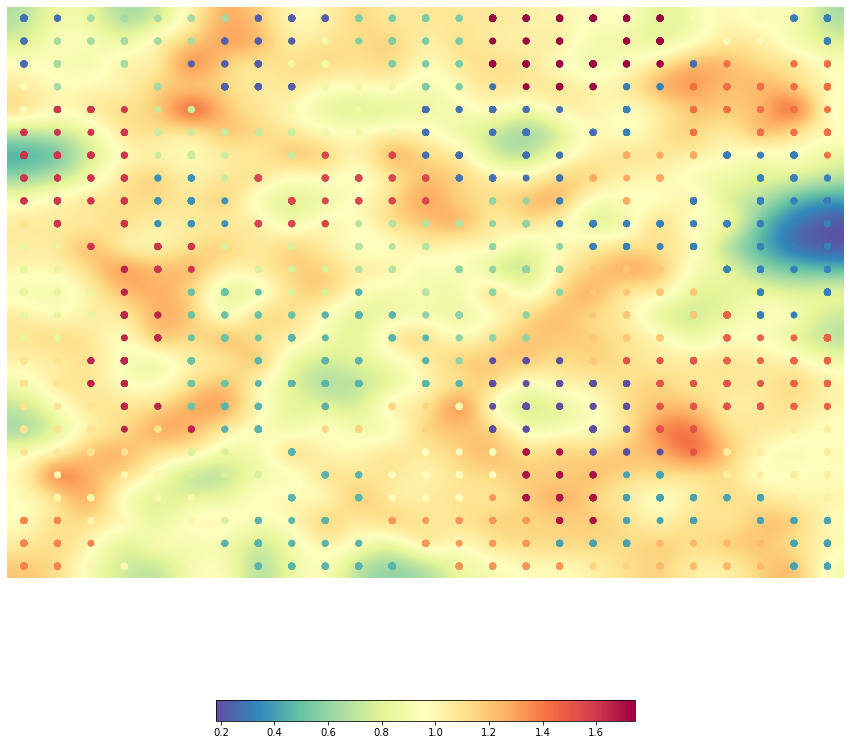

[[ 2  2 10 10 10 10 10  1  1  1  8  8  8  8 34 34 34 34 34 34 16 16 16  3
   3]
 [ 2 10 10 10 10 10  1  1  1 15  8  8  8  8 34 34 34 34 34 34 34 16 16 16
   3]
 [ 2 10 10 10 10  1  1  1 15 15 15  8  8  8 34 34 34 34 34 34  2 27 16 27
  27]
 [16 10 31 10 10 31  1  1  1 15 15 15  8  8  2 34 34 34  3  3 27 27 27 27
  27]
 [16 31 31 31 12 12 31 15 15 15 15 15  2  2  2  2  2  3  3  3 27 27 27 27
  27]
 [31 31 31 31 12 12 12 12 12 15 15 15  2  2  2  2  2  2  3  3 27 27 27 27
  27]
 [31 31 31 31 12 12 12 12 12 30 30 30  2  2  2  2  2 24 24 24 24  3  3  3
  27]
 [31 31 31 31  4  4 12 30 30 30 30 30 30  2  2  2  2 24 24 24 24  3  3  3
   3]
 [31 31 31 31  4  4  4 30 30 30 30 30 30  9  9  9  3  3 24 24  3  3  3  3
   3]
 [20 31 31 31  4  4  4 30 30 30 11 11 11 11  9  9  3  3  3  3  3  3  3  3
   3]
 [14 14 31 31 31 31 13 13 13 11 11 11 11 11  9  9  9  3  3  3  3  3  3  3
   3]
 [14 14 20 32 31 31  7 13 13 13 11 11 11  9  9  9  9 22 22 22  3  3  3  3
   3]
 [14 14 14 32 31  7  7  7 13 13  6 11 11

In [51]:
som.view_umatrix(bestmatches=True, colorbar=True, figsize=(15,15))

print(som.clusters)

uclusters , numNeuronsInCluster = np.unique(som.clusters, return_counts=True)
sortedClustersIndex = np.argsort(numNeuronsInCluster)
print("Clusters sorted by increasing number of neurons:")
print("Cluster Index")
print(sortedClustersIndex)
print("Number of Neurons")
print(numNeuronsInCluster[sortedClustersIndex])


## Σημασιολογική ερμηνεία των clusters

Προκειμένου να μελετήσουμε τις τοπολογικές ιδιότητες του SOM και το αν έχουν ενσωματώσει σημασιολογική πληροφορία για τις ταινίες διαμέσου της διανυσματικής αναπαράστασης του tf-idf, των εμφυτευμάτων και των κατηγοριών, χρειαζόμαστε ένα κριτήριο ποιοτικής επισκόπησης των clusters. 

Θα υλοποιήσουμε το εξής κριτήριο: Λαμβάνουμε όρισμα έναν αριθμό (ετικέτα) cluster. Για το cluster αυτό βρίσκουμε όλους τους νευρώνες που του έχουν ανατεθεί από τον k-Means. Για όλους τους νευρώνες αυτούς βρίσκουμε όλες τις ταινίες που τους έχουν ανατεθεί (για τις οποίες αποτελούν bmus). Για όλες αυτές τις ταινίες τυπώνουμε ταξινομημένη τη συνολική στατιστική όλων των ειδών (κατηγοριών) και τις συχνότητές τους. Αν το cluster διαθέτει καλή συνοχή και εξειδίκευση, θα πρέπει κάποιες κατηγορίες να έχουν σαφώς μεγαλύτερη συχνότητα από τις υπόλοιπες. Θα μπορούμε τότε να αναθέσουμε αυτήν/ές την/τις κατηγορία/ες ως ετικέτες κινηματογραφικού είδους στο cluster.

Μπορείτε να υλοποιήσετε τη συνάρτηση αυτή όπως θέλετε. Μια πιθανή διαδικασία θα μπορούσε να είναι η ακόλουθη:

1. Ορίζουμε συνάρτηση `print_categories_stats` που δέχεται ως είσοδο λίστα με ids ταινιών. Δημιουργούμε μια κενή λίστα συνολικών κατηγοριών. Στη συνέχεια, για κάθε ταινία επεξεργαζόμαστε το string `categories` ως εξής: δημιουργούμε μια λίστα διαχωρίζοντας το string κατάλληλα με την `split` και αφαιρούμε τα whitespaces μεταξύ ετικετών με την `strip`. Προσθέτουμε τη λίστα αυτή στη συνολική λίστα κατηγοριών με την `extend`. Τέλος χρησιμοποιούμε πάλι την `np.unique` για να μετρήσουμε συχνότητα μοναδικών ετικετών κατηγοριών και ταξινομούμε με την `np.argsort`. Τυπώνουμε τις κατηγορίες και τις συχνότητες εμφάνισης ταξινομημένα. Χρήσιμες μπορεί να σας φανούν και οι `np.ravel`, `np.nditer`, `np.array2string` και `zip`.

2. Ορίζουμε τη βασική μας συνάρτηση `print_cluster_neurons_movies_report` που δέχεται ως όρισμα τον αριθμό ενός cluster. Με τη χρήση της `np.where` μπορούμε να βρούμε τις συντεταγμένες των bmus που αντιστοιχούν στο cluster και με την `column_stack` να φτιάξουμε έναν πίνακα bmus για το cluster. Προσοχή στη σειρά (στήλη - σειρά) στον πίνακα bmus. Για κάθε bmu αυτού του πίνακα ελέγχουμε αν υπάρχει στον πίνακα μοναδικών bmus που έχουμε υπολογίσει στην αρχή συνολικά και αν ναι προσθέτουμε το αντίστοιχο index του νευρώνα σε μια λίστα. Χρήσιμες μπορεί να είναι και οι `np.rollaxis`, `np.append`, `np.asscalar`. Επίσης πιθανώς να πρέπει να υλοποιήσετε ένα κριτήριο ομοιότητας μεταξύ ενός bmu και ενός μοναδικού bmu από τον αρχικό πίνακα bmus.

3. Υλοποιούμε μια βοηθητική συνάρτηση `neuron_movies_report`. Λαμβάνει ένα σύνολο νευρώνων από την `print_cluster_neurons_movies_report` και μέσω της `indices` φτιάχνει μια λίστα με το σύνολο ταινιών που ανήκουν σε αυτούς τους νευρώνες. Στο τέλος καλεί με αυτή τη λίστα την `print_categories_stats` που τυπώνει τις στατιστικές των κατηγοριών.

Μπορείτε βέβαια να προσθέσετε οποιαδήποτε επιπλέον έξοδο σας βοηθάει. Μια χρήσιμη έξοδος είναι πόσοι νευρώνες ανήκουν στο cluster και σε πόσους και ποιους από αυτούς έχουν ανατεθεί ταινίες.

Θα επιτελούμε τη σημασιολογική ερμηνεία του χάρτη καλώντας την `print_cluster_neurons_movies_report` με τον αριθμός ενός cluster που μας ενδιαφέρει. 

Παράδειγμα εξόδου για ένα cluster (μη βελτιστοποιημένος χάρτης, ωστόσο βλέπετε ότι οι μεγάλες κατηγορίες έχουν σημασιολογική  συνάφεια):

```
Overall Cluster Genres stats:  
[('"Horror"', 86), ('"Science Fiction"', 24), ('"B-movie"', 16), ('"Monster movie"', 10), ('"Creature Film"', 10), ('"Indie"', 9), ('"Zombie Film"', 9), ('"Slasher"', 8), ('"World cinema"', 8), ('"Sci-Fi Horror"', 7), ('"Natural horror films"', 6), ('"Supernatural"', 6), ('"Thriller"', 6), ('"Cult"', 5), ('"Black-and-white"', 5), ('"Japanese Movies"', 4), ('"Short Film"', 3), ('"Drama"', 3), ('"Psychological thriller"', 3), ('"Crime Fiction"', 3), ('"Monster"', 3), ('"Comedy"', 2), ('"Western"', 2), ('"Horror Comedy"', 2), ('"Archaeology"', 2), ('"Alien Film"', 2), ('"Teen"', 2), ('"Mystery"', 2), ('"Adventure"', 2), ('"Comedy film"', 2), ('"Combat Films"', 1), ('"Chinese Movies"', 1), ('"Action/Adventure"', 1), ('"Gothic Film"', 1), ('"Costume drama"', 1), ('"Disaster"', 1), ('"Docudrama"', 1), ('"Film adaptation"', 1), ('"Film noir"', 1), ('"Parody"', 1), ('"Period piece"', 1), ('"Action"', 1)]```
   

#<center> Σχολιασμός </center>
Παρακάτω υλοποιήσαμε τις συναρτήσεις print_categories_stats, print_cluster_neurons_movie_report και neuron_movies_report, οι οποίες συνεργάζονται για να τυπώσουν σε φθίνουσα σειρά τη συχνότητα εμφάνισης των ειδών των ταινιών που ανήκουν σε κάθε cluster

Η print_categories_stats παίρνει ως όρισμα τα id των ταινιών και επιστρέφει τη συχνότητα εμφάνισης των διαφόρων ειδών (πχ. ρομαντική, θρίλερ, κλπ)

In [52]:
def print_categories_stats(movies_ids):
  total_categories = []
  for id in movies_ids:
    movie_categories = categories[id][0] #είναι array που περιέχει string στη θέση 0 με τις κατηγορίες των ταινιών
    movie_categories = movie_categories.split(",")
    for i in range(0,len(movie_categories)):
      movie_categories[i] = movie_categories[i].strip(' ')
    total_categories.extend(movie_categories)
  uCategories, Category_index, fCategories = np.unique(total_categories, return_index=True, return_counts=True, axis=0)
  sorted_fCategory_indexes = np.argsort(-fCategories)
  categories_stats = []
  for index in sorted_fCategory_indexes:
    categories_stats.append((uCategories[index], fCategories[index]))
  print("Overall Cluster Genres stats:")
  print(categories_stats)

Η print_cluster_neurons_movie_report παίρνει ως όρισμα το νούμερο ενός cluster και μας δίνει τις συνατεταγμένες των ταινιών που ανήκουν σε αυτό το cluster.

In [53]:
def print_cluster_neurons_movie_report(num_of_cluster):
  coordinate_x, coordinate_y = np.where(som.clusters == num_of_cluster)
  cluster_bmus = np.column_stack((coordinate_x,coordinate_y))
  indexes = []
  for bmus_in_cluster in cluster_bmus:
    for index, bmu in enumerate(ubmus):
      if bmu[0] == bmus_in_cluster[0] and bmu[1] == bmus_in_cluster[1]:
        indexes.append(index)
        break      
  return indexes

Η neuron_movies_report δέχεται ως όρισμα τις συντεταγμένες των ταινιών και αφού βρει τα id's τους καλεί την print_categories_stats για να τυπώσει τις συνχότητες εμφάνισης των ειδών.

In [54]:
def neuron_movies_report(indexes):
  movies_ids=[]
  for index in indexes:
    movies = np.where(index==indices)[0]
    movies_ids.extend(movies)
  print_categories_stats(movies_ids)


Η συνχότητα των διαφόρων ειδών ταινιών που έχουμε στο dataset μας.

In [55]:
print_categories_stats(range(0,5000))

Overall Cluster Genres stats:
[('"Drama"', 2256), ('"Comedy"', 1227), ('"Thriller"', 823), ('"Romance Film"', 802), ('"Action"', 702), ('"World cinema"', 602), ('"Crime Fiction"', 512), ('"Horror"', 472), ('"Black-and-white"', 439), ('"Action/Adventure"', 431), ('"Indie"', 410), ('"Short Film"', 398), ('"Family Film"', 391), ('"Adventure"', 381), ('"Science Fiction"', 305), ('"Animation"', 304), ('"Romantic drama"', 296), ('"Musical"', 296), ('"Romantic comedy"', 255), ('"Mystery"', 248), ('"Fantasy"', 245), ('"Comedy film"', 240), ('"War film"', 199), ('"Crime Thriller"', 187), ('"Japanese Movies"', 152), ('"Period piece"', 152), ('"Comedy-drama"', 148), ('"Silent film"', 142), ('"Film adaptation"', 136), ('"Chinese Movies"', 131), ('"Documentary"', 131), ('"Bollywood"', 127), ('"Western"', 126), ('"Psychological thriller"', 121), ('"Teen"', 104), ('"Children\'s/Family"', 98), ('"Martial Arts Film"', 93), ('"Television movie"', 92), ('"Parody"', 92), ('"Black comedy"', 83), ('"Coming 

Η συχνότητα των ειδών που ανήκουν σε κάθε cluster.

In [56]:
for i in sortedClustersIndex:
  print("Cluster:",i)
  neuron_movies_report(print_cluster_neurons_movie_report(i))

Cluster: 26
Overall Cluster Genres stats:
[('"World cinema"', 126), ('"Drama"', 121), ('"Bollywood"', 38), ('"Musical"', 34), ('"Art film"', 22), ('"Japanese Movies"', 12), ('"Action/Adventure"', 8), ('"Family Drama"', 8), ('"Crime Fiction"', 6), ('"Chinese Movies"', 6), ('"Coming of age"', 5), ('"Political drama"', 5), ('"Black-and-white"', 5), ('"Romantic drama"', 3), ('"Horror"', 3), ('"Adventure"', 3), ('"Filipino Movies"', 3), ('"Family Film"', 3), ('"Mystery"', 2), ('"Surrealism"', 2), ('"Martial Arts Film"', 2), ('"Tollywood"', 2), ('"War film"', 2), ('"Film u00e0 clef"', 2), ('"Fantasy"', 2), ('"Road movie"', 2), ('"Action"', 2), ('"Comedy"', 2), ('"Political satire"', 1), ('"Children\'s/Family"', 1), ('"Romantic comedy"', 1), ('"Children\'s"', 1), ('"Samurai cinema"', 1), ('"Satire"', 1), ('"Christian film"', 1), ('"Science Fiction"', 1), ('"Slice of life story"', 1), ('"Social issues"', 1), ('"Childhood Drama"', 1), ('"Thriller"', 1), ('"Biographical film"', 1), ('"Bengali Ci


## Tips για το SOM και το clustering

- Για την ομαδοποίηση ένα U-matrix καλό είναι να εμφανίζει και μπλε-πράσινες περιοχές (clusters) και κόκκινες περιοχές (ορίων). Παρατηρήστε ποια σχέση υπάρχει μεταξύ αριθμού ταινιών στο final set, μεγέθους grid και ποιότητας U-matrix.
- Για το k του k-Means προσπαθήστε να προσεγγίζει σχετικά τα clusters του U-matrix (όπως είπαμε είναι διαφορετικοί μέθοδοι clustering). Μικρός αριθμός k δεν θα σέβεται τα όρια. Μεγάλος αριθμός θα δημιουργεί υπο-clusters εντός των clusters που φαίνονται στο U-matrix. Το τελευταίο δεν είναι απαραίτητα κακό, αλλά μεγαλώνει τον αριθμό clusters που πρέπει να αναλυθούν σημασιολογικά.
- Σε μικρούς χάρτες και με μικρά final sets δοκιμάστε διαφορετικές παραμέτρους για την εκπαίδευση του SOM. Σημειώστε τυχόν παραμέτρους που επηρεάζουν την ποιότητα του clustering για το dataset σας ώστε να τις εφαρμόσετε στους μεγάλους χάρτες.
- Κάποια τοπολογικά χαρακτηριστικά εμφανίζονται ήδη σε μικρούς χάρτες. Κάποια άλλα χρειάζονται μεγαλύτερους χάρτες. Δοκιμάστε μεγέθη 20x20, 25x25 ή και 30x30 και αντίστοιχη προσαρμογή των k. Όσο μεγαλώνουν οι χάρτες, μεγαλώνει η ανάλυση του χάρτη αλλά μεγαλώνει και ο αριθμός clusters που πρέπει να αναλυθούν.




## Ανάλυση τοπολογικών ιδιοτήτων χάρτη SOM

Μετά το πέρας της εκπαίδευσης και του clustering θα έχετε ένα χάρτη με τοπολογικές ιδιότητες ως προς τα είδη των ταίνιών της συλλογής σας, κάτι αντίστοιχο με την εικόνα στην αρχή της Εφαρμογής 2 αυτού του notebook. Η συγκεκριμένη εικόνα είναι μόνο για εικονογράφιση, δεν είναι χάρτης SOM καιδεν έχει καμία σχέση με τη συλλογή δεδομένων και τις κατηγορίες μας.

Για τον τελικό χάρτη SOM που θα παράξετε για τη συλλογή σας, αναλύστε σε markdown με συγκεκριμένη αναφορά σε αριθμούς clusters και τη σημασιολογική ερμηνεία τους τις εξής τρεις τοπολογικές ιδιότητες του SOM: 

1. Δεδομένα που έχουν μεγαλύτερη πυκνότητα πιθανότητας στο χώρο εισόδου τείνουν να απεικονίζονται με περισσότερους νευρώνες στο χώρο μειωμένης διαστατικότητας. Δώστε παραδείγματα από συχνές και λιγότερο συχνές κατηγορίες ταινιών. Χρησιμοποιήστε τις στατιστικές των κατηγοριών στη συλλογή σας και τον αριθμό κόμβων που χαρακτηρίζουν.
2. Μακρινά πρότυπα εισόδου τείνουν να απεικονίζονται απομακρυσμένα στο χάρτη. Υπάρχουν χαρακτηριστικές κατηγορίες ταινιών που ήδη από μικρούς χάρτες τείνουν να τοποθετούνται σε διαφορετικά ή απομονωμένα σημεία του χάρτη.
3. Κοντινά πρότυπα εισόδου τείνουν να απεικονίζονται κοντά στο χάρτη. Σε μεγάλους χάρτες εντοπίστε είδη ταινιών και κοντινά τους υποείδη.

Προφανώς τοποθέτηση σε 2 διαστάσεις που να σέβεται μια απόλυτη τοπολογία δεν είναι εφικτή, αφενός γιατί δεν υπάρχει κάποια απόλυτη εξ ορισμού για τα κινηματογραφικά είδη ακόμα και σε πολλές διαστάσεις, αφετέρου γιατί πραγματοποιούμε μείωση διαστατικότητας.

Εντοπίστε μεγάλα clusters και μικρά clusters που δεν έχουν σαφή χαρακτηριστικά. Εντοπίστε clusters συγκεκριμένων ειδών που μοιάζουν να μην έχουν τοπολογική συνάφεια με γύρω περιοχές. Προτείνετε πιθανές ερμηνείες.


Τέλος, εντοπίστε clusters που έχουν κατά την άποψή σας ιδιαίτερο ενδιαφέρον στη συλλογή της ομάδας σας (data exploration / discovery value) και σχολιάστε.


#<center> Σχολιασμός </center>
1. Παρατηρούμε ότι τα πιο συχνά είδη ταινιών είναι τα: drama, comedy. Αντίστοιχα οι περισσότεροι νευρώνες (55) ανήκουν στο cluster 6 που το βασικό είδος είναι το drama, ενώ τα επόμενα δύο πολυπληθέστερα cluster είναι τα 3,31 με 51,32 νευρώνες αντίστοιχα στα οποία κυρίαρχο είδος είναι το comedy.
2. Άμα παρατηρήσουμε την πάνω αριστερά γωνία του χάρτη, το cluster 2 έχει ως κυρίαρχα είδη: documentary, romance film,  και την κάτω δεξιά γωνία του χάρτη, το cluster 5 που έχει ως κυρίαρχα είδη: action, crime fiction, βλέπουμε ότι οι δύο ταινίες διαφέρουν πολύ στα είδη τους, όπως είναι και το αναμενόμενο.
3. Αντίστοιχα, τανίες που μοιάζουν μεταξύ τους τείνουν να απεικονίζονται κοντά στο χάρτη, είτε στο ίδιο cluster είτε σε διπλανά τα οποία έχουν πολλά κοινά χαρακτηριστικά. Για παράδειγμα τα cluster 15, 1 είναι γειτονικά σε πολλά σημεία και έχουν ως κυρίαρχο χαρακτηριστικό την κωμωδία ενώ και τα δύο έχουν και λίγο horror.
</br> </br>
Κάναμε πολλές δοκιμές, χρησιμοποιώντας είτε το απλό tfidf είτε το tfidf που περιείχε και εμφυτεύματα, δοκιμάσαμε χάρτες διαφόρων διαστάσεων(10x10, 20x20, 25x25, 30x30) και πολλές τιμές για το k(=10,15,20,25,30,35,40). Παρατηρήσαμε ότι η τοποθέτηση σε 2 διαστάσεις δεν ήταν απόλυτα αποτελεσματική όπως είναι αναμενόμενο. Αυτό συμβαίνει λόγω του προβλήματος swiss roll, το οποίο αναδεικνύει το ελλάτωμα της αναπαράστασης σε χάρτη 2 διστάσεων για dataset με μεγάλη διαστατικότητα. Ένα τέτοιο Dataset είναι και το δκό μας, καθώς τα κινηματογραφικά είδη δεν είανι εύκολο να απαραστατωθούν γενικά πόσο μάλλον σε 2 διαστάσεις. 
- Ένα μικρό cluster που δεν έχει σαφή χαρακτηριστικά είναι το cluster 4 που όπως φαίνεται στην παραπάνω ανάλυση δεν έχει κάποιο είδος ταινίας που να τ ξεχωρίζει. Αντίστοιχο πολυπληθές cluster είναι το cluster 9, στο όποιο το πιο συχνό είδος εμφανίζεται μόνο 41 φορές. 
-Το cluster 9, με κύρια χαρακτηριστικά τα black-and-white, musical, γειτονεύει με τα cluster 8, 0 στα οποία βασικό χαρακτηριστικό είναι το thriler και το horror. Πιθανός λόγος είναι ο αριθμός των εποχών που χρησιμοποιήθηκαν να μην ήταν αρκετός για να έχει τη σωστή διαφοροποίηση. Ο πιθανότερος, βέβαια λόγος, είανι sxwiss roll problem στο οποίο αναφερθήκαμε νωρίτερα, δηλαδή η προσπάθει απεικόνισης σε πίνακα 2 διαστάσεων ενός προβλήματος μεγάλης διαστατικότητας.
-Ενδφιαφέρον έχει το γεγονός ότι πάνω σε κόκκινες περιοχές υπάρχουν συχνά νευρώνες που αντιστοιχούν στο είδος κωμωδία το οποίο είναι λογικό καθώς έχει πολλές ύπο κατηγοριές, όπως romance, black, κλπ. Σε μια άλλη κόκκινη περιοχή κυριαρχή το cluster 0 με κυρίαρχο είδος το thriller. Αυτό και πάλι εξηγείται λόγω των πολλών υποκατηγοριών που έχουν τα thriller, πχ, psychological thriller, crime thriller, κλπ.

Παρακάτω παρατήθειται χάρτης που δημιουργήθηκε με τη χρήση του tfidf με embeddings που μας έδωσε το μοντέλο glove-wiki-50, 20x20 με k=20. 

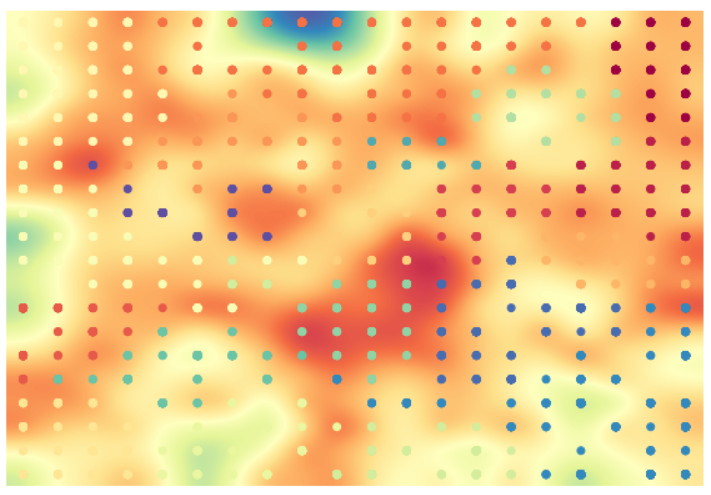


# Τελική παράδοση άσκησης

- Θα παραδώσετε στο helios το παρόν notebook επεξεργασμένο ή ένα ή δύο νέα zipαρισμένα με τις απαντήσεις σας για τα ζητούμενα και των δύο εφαρμογών. 
- Θυμηθείτε ότι η ανάλυση του χάρτη στο markdown με αναφορά σε αριθμούς clusters πρέπει να αναφέρεται στον τελικό χάρτη με τα κελιά ορατά που θα παραδώσετε αλλιώς ο χάρτης που θα προκύψει θα είναι διαφορετικός και τα labels των clusters δεν θα αντιστοιχούν στην ανάλυσή σας. 
- Μην ξεχάσετε στην αρχή ένα κελί markdown με **τα στοιχεία της ομάδας σας**.

<table>
  <tr><td align="center">
    <font size="4">Παρακαλούμε διατρέξτε βήμα-βήμα το notebook για να μην ξεχάσετε παραδοτέα</font>
</td>
  </tr>
</table>